In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Copie de du fichier ```Poisson_Modia.py```

norm L2 =  0.05391078776920662


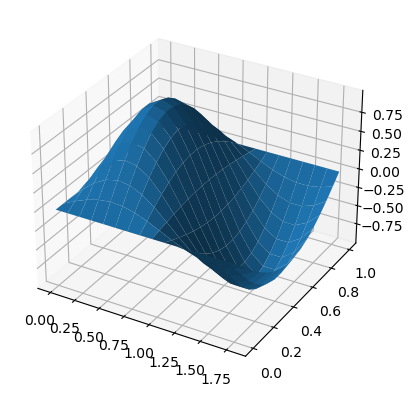

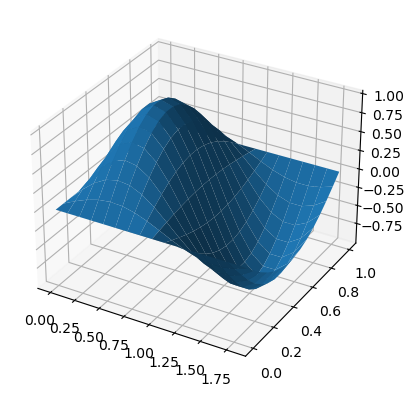

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  5 18:34:48 2021

@author: cantin
"""

import numpy as np
import numpy.linalg as npl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#  Discrétisation en espace


xmin = 0.0; xmax = 1.8; nptx = 16; nx = nptx-2  
hx = (xmax-xmin)/(nptx -1)
xx = np.linspace(xmin,xmax,nptx) 
xx = xx.transpose()
xxint = xx[1:nx+1]
ymin = 0.0; ymax = 1.0; npty = 16; ny = npty-2 
hy = (ymax-ymin)/(npty -1)
yy = np.linspace(ymin,ymax,npty)
yy=yy.transpose() 
yyint = yy[1:ny+1]

# AJOUT DU PARAMÈTRE MU PAR MOI :
mu = 1 

#  Matrix system
# On Ox
# TEMPLATE :
#Kx # Local matrix of size Nx+2 relative to Ox discretization
#K2Dx # Global Matrix of (Ny+2)**2 matrices of size (Nx+2)**2
# IMPLEMENTATION :
Kx = np.zeros((nx+2,nx+2))
Kx[0,0] = 1 # Quelconque différent de 0
Kx[nx+1,nx+1] = 1 # Quelconque différent de 0
for i in range(1,nx+1):
    Kx[i,i] = (2*mu)/(hx**2) + (2*mu)/(hy**2)
    Kx[i,i-1] = -mu/(hx**2)
    Kx[i,i+1] = -mu/(hx**2)
K2Dx = np.eye((nx+2)*(ny+2),(nx+2)*(ny+2))
for i in range(1,ny+1):
    K2Dx[i*(nx+2):(i+1)*(nx+2),i*(nx+2):(i+1)*(nx+2)] = Kx

# On Oy
# TEMPLATE :
#Ky # Local matrix of size Nx+2 relative to Oy discretization
#K2Dy # Global Matrix of (Ny+2)**2 matrices of size (Nx+2)**2
# IMPLEMENTATION :
Ky = np.zeros((nx+2,nx+2))
for i in range(1,nx+1):
    Ky[i,i] = -mu/(hy**2)
K2Dy = np.zeros(((nx+2)*(ny+2),(nx+2)*(ny+2)))
#K2Dy[0:(nx+2),0:(nx+2)] = np.zeros(nx+2,nx+2)
for i in range(1,ny + 1):
    K2Dy[i*(nx+2):(i+1)*(nx+2),(i-1)*(nx+2):i*(nx+2)] = Ky
    K2Dy[i*(nx+2):(i+1)*(nx+2),(i+1)*(nx+2):(i+2)*(nx+2)] = Ky

#
#
K2D = K2Dx + K2Dy # Final matrix of Laplacien operator with Dirichlet Boundary conditions
#
##  Solution and source terms
u = np.zeros((nx+2)*(ny+2)) #Numerical solution
u_ex = np.zeros((nx+2)*(ny+2)) #Exact solution
F = np.zeros((nx+2)*(ny+2)) #Source term
#
#
# Source term
def Source_int(x):
    return 2*np.pi**2*(np.sin(np.pi*x[0])*np.sin(np.pi*x[1]))
def Source_bnd(x):
    return np.sin(np.pi*x[0])*np.sin(np.pi*x[1])
def Sol_sin(x):
    return np.sin(np.pi*x[0])*np.sin(np.pi*x[1])
for i in range(nptx):
    for j in range(npty):
        coord = np.array([i*hx,j*hy])
        u_ex[j*(nx+2) + i] = Sol_sin(coord)
    if i==0 or i==nptx-1: # Boundary x=0 ou x=xmax
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            F[j*(nx+2) + i]=Source_bnd(coord)
    else:
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            if j==0 or j==npty-1: # Boundary y=0 ou y=ymax
                F[j*(nx+2) + i]=Source_bnd(coord)
            else:
                F[j*(nx+2) + i]=Source_int(coord)




#        
#Post-traintement u_ex+Visualization of the exct solution
uu_ex = np.reshape(u_ex,(nx+2 ,ny+2),order = 'F');
X,Y = np.meshgrid(xx,yy)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu_ex.T,rstride = 1, cstride = 1);

#        
u = npl.solve(K2D,F)
uu = np.reshape(u,(nx+2 ,ny+2),order = 'F');
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu.T,rstride = 1, cstride = 1);


# Error
print('norm L2 = ',npl.norm(u-u_ex))

Copie de du fichier ```Concentration_Modia.py```

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  5 18:34:48 2021

@author: cantin
"""

import numpy as np
import numpy.linalg as npl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#  Discrétisation en espace


xmin = 0.0; xmax = 2; nptx = 61; nx = nptx-2  
hx = (xmax-xmin)/(nptx -1)
xx = np.linspace(xmin,xmax,nptx) 
xx = xx.transpose()
xxint = xx[1:nx+1]
ymin = 0.0; ymax = 1.0; npty = 31; ny = npty-2 
hy = (ymax-ymin)/(npty -1)
yy = np.linspace(ymin,ymax,npty)
yy=yy.transpose() 
yyint = yy[1:ny+1]


# =============================================================================
### Parameters
mu = 0.01 # Diffusion parameter
vx = 1 # Vitesse along x
# =============================================================================

cfl = 0.2  # cfl =mu*dt/hx^2+mu*dt/hy^2 ou v*dt/h
dt = (hx**2)*(hy**2)*cfl/(mu*(hx**2 + hy**2)) # dt = pas de temps
dt = cfl*hx/vx
Tfinal = 0.8   # Temps final souhaitÃ©



###### Matrice de Diffusion Dir/Neumann



#### Matrice de Convection  (Centré)



#### Global matrix : diffusion + convection
A2D = -(K2D + V2Dx) #-mu*Delta + V.grad
#
#
##  Cas explicite
u = np.zeros((nx+2)*(ny+2))
u_ex = np.zeros((nx+2)*(ny+2))
err = np.zeros((nx+2)*(ny+2))
F = np.zeros((nx+2)*(ny+2))
#
#
# =============================================================================
# Time stepping
# =============================================================================
s0 = 0.1
x0 = 0.25
y0=0.5

def Sol_init(x):
    return np.exp( -((x[0]-x0)/s0)**2 -((x[1]-y0)/s0)**2   )



u_init = np.zeros((nx+2)*(ny+2))
for i in range(nptx):
     for j in range(npty):
             coord = np.array([xmin+i*hx,ymin+j*hy])
             u_init[j*(nx+2) + i] = Sol_init(coord)
             
             
uu_init = np.reshape(u_init,(nx+2 ,ny+2),order = 'F');
fig = plt.figure(figsize=(10, 7))
X,Y = np.meshgrid(xx,yy)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, uu_init.T, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.view_init(60, 35)
plt.pause(1.)
             
## Initialize u by the initial data u0
u = u_init.copy()

# Nombre de pas de temps effectues
nt = int(Tfinal/dt)
Tfinal = nt*dt # on corrige le temps final (si Tfinal/dt n'est pas entier)

# Time loop
for n in range(1,nt+1):

  # Schéma explicite en temps


 # Print solution
    if n%5 == 0:
      plt.figure(1)
      plt.clf()
      fig = plt.figure(figsize=(10, 7))
      ax = plt.axes(projection='3d')
      uu = np.reshape(u,(nx+2 ,ny+2),order = 'F');
      surf = ax.plot_surface(X, Y, uu.T, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
      ax.view_init(60, 35)
      plt.title(['Schema explicite avec CFL=%s' %(cfl), '$t=$%s' %(n*dt)])
      plt.pause(0.1)

####################################################################
# comparaison solution exacte avec solution numerique au temps final
j0 = int((npty-1)/2)


plt.figure(2)
plt.clf()
x = np.linspace(xmin,xmax,nptx)
plt.plot(x,uu_init[:,j0],x,uu[:,j0],'k') #,x,uexacte,'or')
plt.legend(['Solution initiale','Schema explicite =%s' %(cfl)]) #,'solution exacte'],loc='best')
plt.show()

